In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


In [2]:
# Load dataset
data = load_iris()
X, y = data.data, data.target
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:1.0


In [3]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, roc_curve
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)
y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model thatalways predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5
print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [5]:
# below are the probabilities obtained from a hypothetical model thatdoesn't always predict the mode
y_proba_2 = np.array(
np.random.uniform(0, .7, n_0).tolist() +
np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5
print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')


accuracy score: 0.7156
Confusion matrix
[[ 374  126]
 [2718 6782]]
class 0 accuracy: 0.748
class 1 accuracy: 0.7138947368421052


model 1 AUC score: 0.5
model 2 AUC score: 0.8438372631578948


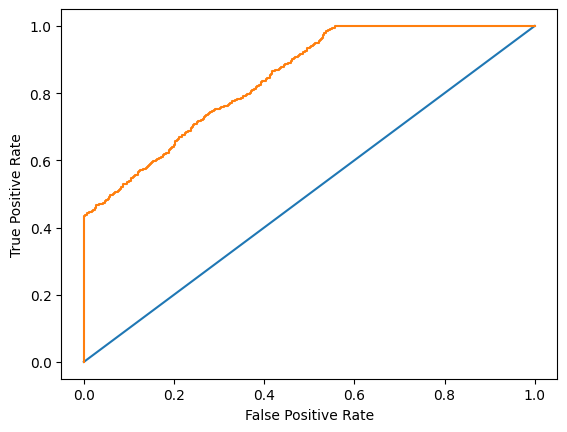

In [6]:
import matplotlib.pyplot as plt
def plot_roc_curve(true_y, y_prob): 
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Panaudodami mašininį mokymąsi (linearRegression, Logistic, DecisionTree ...)
# pateikite orų prognozę 24rioms valandoms į priekį.
# Pritaikykite daugiau nei vieną ML algoritmą.
# Pateikite Modelių tikslumo įverčius.
# Pateikite Modelio prognozę, LHMT tarnybos prognozę, o praėjus 24 valandoms - stebėjimų rezultatus,
# pagal kuriuos apskaičiuosite modelių tikslumus.

# https://janaksenevirathne.medium.com/building-a-weather-prediction-model-with-machine-learning-a-step-by-step-guide-9eaf768171be

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# forest = RandomForestRegressor()
# forest.fit(X_train_s, y_train)


# https://archyvas.meteo.lt/?station=vilniaus-ams&start_date=2024-12-23&end_date=2024-12-23&meteo-form=Rodyti

# https://towardsdatascience.com/ways-to-evaluate-regression-models-77a3ff45ba70 

In [8]:
import pandas as pd

In [9]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [10]:
orai = pd.read_csv('../../../eismas/interval_data.csv')

orai.head(2)

,obs_time_utc,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code
0,2024-12-30 00:00:00,1.6,-1.8,3.3,5.3,212,NaN,1018.9,100,0.0,light-rain
1,2024-12-30 01:00:00,1.5,-2.0,3.4,6.5,213,100.0,1018.6,100,0.0,rain


In [ ]:
orai.columns


In [11]:
orai.drop(columns=['feels_like_temperature','wind_speed', 'wind_gust', 'wind_direction', 'precipitation',
       'condition_code' ], inplace=True)
orai.head()

,obs_time_utc,air_temperature,cloud_cover,sea_level_pressure,relative_humidity
0,2024-12-30 00:00:00,1.6,NaN,1018.9,100
1,2024-12-30 01:00:00,1.5,100.0,1018.6,100
2,2024-12-30 02:00:00,1.6,100.0,1018.3,100
3,2024-12-30 03:00:00,1.6,100.0,1017.5,100
4,2024-12-30 04:00:00,1.8,100.0,1016.8,100


In [85]:
orai = orai.rename(columns={'obs_time_utc': 'datetime'})
df = orai

In [ ]:
# Step 1: Load the data
# Assuming the data is already loaded into a DataFrame named df
# df = pd.read_csv('your_file.csv') # Uncomment if loading from CSV

# Ensure datetime is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Step 2: Feature Engineering
# Extract useful time-based features
# df['hour'] = df['datetime'].dt.hour
# df['day_of_week'] = df['datetime'].dt.dayofweek

df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# Step 3: Prepare the target variable
# Shift the air_temperature by -1 to use current features to predict the next hour's temperature
df['next_hour_temp'] = df['air_temperature'].shift(-1)

# Drop the last row since it will have NaN in 'next_hour_temp'
df = df.dropna()

# Step 4: Define features (X) and target (y)
features = ['air_temperature', 'cloud_cover', 'sea_level_pressure', 'relative_humidity', 'hour', 'day', 'month']
X = df[features]
y = df['next_hour_temp']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Step 7: Predict the next 24 hours
# Get the last row to create features for the next 24 hours
last_row = X.iloc[-1]

future_hours = []
for i in range(1, 25):
    next_hour = (last_row['hour'] + i) % 24
    next_day_of_week = (last_row['day_of_week'] + (last_row['hour'] + i) // 24) % 7
    future_hours.append({
        'air_temperature': last_row['air_temperature'],  # This will be updated iteratively
        'cloud_cover': last_row['cloud_cover'],
        'sea_level_pressure': last_row['sea_level_pressure'],
        'relative_humidity': last_row['relative_humidity'],
        'hour': next_hour,
        'day_of_week': next_day_of_week
    })

future_df = pd.DataFrame(future_hours)

# Predict the air temperature for the next 24 hours
future_predictions = model.predict(future_df)
print(f"Next 24 hours temperature prediction: {future_predictions}")

In [ ]:
future_df.head(2)

In [14]:
# l = LabelEncoder().fit_transform(orai['condition_code'])
# orai['condition_code'] = l
orai = orai.rename(columns={'obs_time_utc': 'datetime'})
orai['datetime'] = pd.to_datetime(orai['datetime'])  # Ensure datetime is in correct format

orai = orai.set_index('datetime')  # Set datetime as index
orai = orai.resample('h').mean()  # Resample to hourly data if necessary

# Feature Engineering
orai['hour'] = orai.index.hour
orai['day'] = orai.index.dayofweek
orai['month'] = orai.index.month

# orai.reset_index()
# Target variable: 'temperature' of the next hour
orai['next_hour_temp'] = orai['air_temperature'].shift(-1)
orai.dropna(inplace=True)
orai.head()

,air_temperature,cloud_cover,sea_level_pressure,relative_humidity,next_hour_temp,hour,day,month
datetime,,,,,,,,
2024-12-30 01:00:00,1.5,100.0,1018.6,100.0,1.6,1,0,12
2024-12-30 02:00:00,1.6,100.0,1018.3,100.0,1.6,2,0,12
2024-12-30 03:00:00,1.6,100.0,1017.5,100.0,1.8,3,0,12
2024-12-30 04:00:00,1.8,100.0,1016.8,100.0,2.4,4,0,12
2024-12-30 05:00:00,2.4,100.0,1017.2,100.0,2.7,5,0,12


In [16]:
# Linear Regression
X = orai.drop(columns=['next_hour_temp', 'air_temperature' ])
y = orai['air_temperature'].values      # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
y_pred = fit.predict(X_test)

# spejimai = pd.Series(data=y_pred, name='Spejimai')
# orig_rez = pd.Series(data=y_test, name='Ytest')
# res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)

fit_score = fit.score(X_test, y_test) *100.0
print(f'fit score: {fit_score}')

# # Make predictions
# y_pred = fit.predict(X_test)

# Evaluate Accuracy
# accuracy = accuracy_score(y_test, y_pred)

# Evaluate Precision
# precision = precision_score(y_test, y_pred, average='weighted')

# # Evaluate Recall
# recall = recall_score(y_test, y_pred, average='weighted')

# # Evaluate F1 Score
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print the evaluation metrics
# # print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")


fit score: 65.88300063344668
